### Phase 2 (Data Understanding)

Tässä dokumentissa tehdään yhteenvetoraportti, joka antaa kattavan yleiskuvan datasetistä. 

### 1. Perustiedot datasetistä

Lähdetään käymään datan perusominaisuuksia läpi. Tarkastellaan datasetin muotoa, sarakkeiden nimiä sekä tyyppejä ja miten eri datatyypit jakautuvat sarakkeissa.

#### 1.1 Rivien ja sarakkeiden lukumäärät

In [1]:
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

file_path = r"D:\Koulu\AIDA_S24\AIDA_project\aida-projekti-local\archive\used_cars_data.csv"

df = pd.read_csv(file_path)

print(f"Rivien määrä: {df.shape[0]}")
print(f"Sarakkeiden määrä: {df.shape[1]}")

Rivien määrä: 3000040
Sarakkeiden määrä: 66


#### 1.2 Sarakkeiden nimet ja tyypit

In [2]:
print("Sarakkeiden nimet ja tyypit:")
print(df.info())

Sarakkeiden nimet ja tyypit:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make   

#### 1.3 Datassa olevien kategoristen ja numeeristen sarakkeiden määrä

In [3]:
# Jaa sarakkeet tyypin mukaan
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Numeerisia sarakkeita: {len(num_cols)}")
print(f"Kategorisia sarakkeita: {len(cat_cols)}")

Numeerisia sarakkeita: 18
Kategorisia sarakkeita: 46


### 1.4 Perustietojen yhteenveto

Huomaamme, että datasetti on hyvinkin suuri. Siinä on kolme miljoonaa riviä ja 66 saraketta. Kun tarkastelemme sarakkeita lisää, huomaamme että enemmistö (n. 70%) on jossa muussa kuin numeerisessa muodossa. Tämä tuottaa meille todennäköisesti työtä datan esikäsittely vaiheessa.

### 2. Yhteenvetotilastot

Tässä vaiheessa tiivistetään aineiston ominaisuuksia: numeerisille sarakkeille lasketaan keskiarvot, hajonnat ja ääripäät, kun taas kategorisille sarakkeille tarkastellaan luokkien esiintymistiheyksiä.

#### 2.1 Keskiarvo, mediaani, minimi, maksimi, hajonta

In [4]:
summary_stats = df.describe()
summary_stats = summary_stats.drop('listing_id', axis=1)  # Poistetaan listing id sillä se tulosti tyhmiä ja turhia arvoja
summary_stats['median'] = df.median(numeric_only=True)  # Mediaani
summary_stats = summary_stats.round(2)
print(summary_stats)

       city_fuel_economy  combine_fuel_economy  daysonmarket  \
count         2508755.00                   0.0    3000040.00   
mean               22.69                   NaN         76.06   
std                 8.81                   NaN        108.88   
min                 7.00                   NaN          0.00   
25%                18.00                   NaN         14.00   
50%                21.00                   NaN         35.00   
75%                26.00                   NaN         82.00   
max               127.00                   NaN       3599.00   

       engine_displacement  highway_fuel_economy  horsepower  is_certified  \
count           2827654.00            2508755.00  2827654.00           0.0   
mean               2968.49                 29.47      248.00           NaN   
std                1348.90                  7.77       90.47           NaN   
min                 700.00                 10.00       55.00           NaN   
25%                2000.00       

In [5]:
# Tiputetaan kolumnien määrää jotta tulos on luettavissa
important_cols = [
    'body_type', 'engine_cylinders', 'fuel_type', 'exterior_color',
    'has_accidents', 'transmission', 'wheel_system', 'franchise_make',
    'interior_color', 'salvage'
]

for col in important_cols:
    if col in df.columns:
        print(f"Arvojakauma sarakkeelle '{col}':")
        print(df[col].value_counts())
        print("\n")

Arvojakauma sarakkeelle 'body_type':
body_type
SUV / Crossover    1416402
Sedan               742036
Pickup Truck        474595
Hatchback            88374
Minivan              79802
Coupe                71607
Van                  47166
Wagon                40505
Convertible          26010
Name: count, dtype: int64


Arvojakauma sarakkeelle 'engine_cylinders':
engine_cylinders
I4                           1418291
V6                            737066
V8                            279939
V8 Flex Fuel Vehicle           78372
I4 Hybrid                      72712
V6 Flex Fuel Vehicle           68337
H4                             65861
I3                             54301
I6                             28322
I6 Diesel                      23438
V8 Biodiesel                   22148
I4 Flex Fuel Vehicle            9187
I4 Diesel                       7210
V6 Diesel                       6657
V8 Diesel                       6266
I5                              5301
H6                           

### 2.4 Yhteenvetotilastojen yhteenveto

Saaduista tuloksista voitaisiin päätellä, että SUV, sedanit, ja nelisylinteriset moottorit dominoivat markkinoita. Bensiini on yleisin polttoainetyyppi, ja musta sekä valkoinen suosituimmat värit. Onnettomuushistoriattomat autot ja automaattivaihteistot ovat todennäköisimmin kysyttyjä. Suosituimmat merkit ovat Ford, Chevrolet ja Toyota. Harvinaisemmat ominaisuudet, kuten värit ja moottorit, voivat vaikuttaa myyntinopeuteen. Ei siis juurikaan yllätyksiä, mutta se on tässä vaiheessa jopa mukavaa.

### 3. Kuvaukset muuttujista

Tässä vaiheessa yritetään löytää muuttujia ja poikkeamia datasta, kuten puuttuvia arvoja sekä äärimmäisen korkeita tai matalia arvoja.

#### 3.1 Puuttuvat arvot

In [6]:
# Näytetään kaikki rivit
pd.set_option('display.max_rows', None)

null_counts = df.isnull().sum()
print(null_counts)

vin                              0
back_legroom                159269
bed                        2980472
bed_height                 2570942
bed_length                 2570942
body_type                    13543
cabin                      2936507
city                             0
city_fuel_economy           491285
combine_fuel_economy       3000040
daysonmarket                     0
dealer_zip                       0
description                  77901
engine_cylinders            100581
engine_displacement         172386
engine_type                 100581
exterior_color               49955
fleet                      1426595
frame_damaged              1426595
franchise_dealer                 0
franchise_make              572635
front_legroom               159269
fuel_tank_volume            159269
fuel_type                    82724
has_accidents              1426595
height                      159269
highway_fuel_economy        491285
horsepower                  172386
interior_color      

#### 3.2 Uniikkien arvojen määrät

In [7]:
# Halutaan erityisesti tietää kategoristen ja tekstisarakkeiden uniikit arvot
cat_text_cols = df.select_dtypes(include=['object', 'category']).columns

unique_ratios = df[cat_text_cols].nunique() / len(df) * 100

# Päädyin tekemään tämän prosenteille jolloin luettavuus ja ymmärrettävyys pysyi mielestäni selvempänä
print("Uniikkien arvojen prosenttiosuudet:")
for col, ratio in unique_ratios.items():
    print(f"{col}: {ratio:.2f}%")

Uniikkien arvojen prosenttiosuudet:
vin: 100.00%
back_legroom: 0.01%
bed: 0.00%
bed_height: 0.00%
bed_length: 0.00%
body_type: 0.00%
cabin: 0.00%
city: 0.16%
dealer_zip: 0.31%
description: 83.98%
engine_cylinders: 0.00%
engine_type: 0.00%
exterior_color: 0.96%
fleet: 0.00%
frame_damaged: 0.00%
franchise_make: 0.00%
front_legroom: 0.00%
fuel_tank_volume: 0.01%
fuel_type: 0.00%
has_accidents: 0.00%
height: 0.02%
interior_color: 1.52%
isCab: 0.00%
is_cpo: 0.00%
is_oemcpo: 0.00%
length: 0.03%
listed_date: 0.06%
listing_color: 0.00%
main_picture_url: 80.53%
major_options: 9.33%
make_name: 0.00%
maximum_seating: 0.00%
model_name: 0.05%
power: 0.07%
salvage: 0.00%
sp_name: 0.87%
theft_title: 0.00%
torque: 0.07%
transmission: 0.00%
transmission_display: 0.00%
trimId: 1.38%
trim_name: 0.30%
wheel_system: 0.00%
wheel_system_display: 0.00%
wheelbase: 0.02%
width: 0.01%


#### 3.3 Mahdolliset anomaliat

In [8]:
num_cols = df.select_dtypes(include=['number']).columns

# min ja max arvot numeerisille sarakkeille
extreme_values = df[num_cols].agg(['min', 'max'])
print("Minimi- ja maksimiarvot:")
print(extreme_values)

# Laske Q1 = 25% ja Q3 = 75% sekä IQR
# jolloin IQR = keskimmäiset 50% datasta
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Määritä poikkeavien arvojen raja-arvot
# esim. price Q1 = 18k ja Q3 = 38k. IQR = ~20k
# raja-arvot
lower_bound = Q1 - 1.5 * IQR # esim 18000 - 1.5 * 20000 = ~11k
upper_bound = Q3 + 1.5 * IQR # esim 38000 + 1.5 * 20000 = ~69k

# Tarkista, mitkä arvot ovat näiden rajojen ulkopuolella
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()
print("Poikkeavien arvojen lukumäärä sarakkeittain:")
print(outliers)

Minimi- ja maksimiarvot:
     city_fuel_economy  combine_fuel_economy  daysonmarket  \
min                7.0                   NaN             0   
max              127.0                   NaN          3599   

     engine_displacement  highway_fuel_economy  horsepower  is_certified  \
min                700.0                  10.0        55.0           NaN   
max               8400.0                 127.0      1001.0           NaN   

     latitude  listing_id  longitude     mileage  owner_count      price  \
min   18.3467    19946203  -157.9280         0.0          1.0      165.0   
max   61.2031   282022171   -66.0785  99999988.0         19.0  3299995.0   

     savings_amount  seller_rating     sp_id  vehicle_damage_category  year  
min               0            1.0   41593.0                      NaN  1915  
max          147414            5.0  440951.0                      NaN  2021  
Poikkeavien arvojen lukumäärä sarakkeittain:
city_fuel_economy           78911
combine_fuel_econ

### 3.4 Muuttujien yhteenveto

Aineistosta löytyy poikkeavia arvoja, jotka voivat kertoa harvinaisista tapauksista tai yksinkertaisesti datan luonnollisesta vaihtelusta. Erittäin korkeat tai matalat arvot voivat johtua markkinoiden erikoisuuksista tai keruumenetelmien eroista, ja tämä on loogista sillä dataa tulee monesta paikasta. Pohdittava ryhmän kanssa miten näitten ominaisuuksien käsittely toteutetaan ja säilytetäänkö joitan ollenkaan mukana.

### 4. Korrelaatiot

Tässä osiossa piirretään kuvaajia sekä matriiseja joilla voidaan analysoida ominaisuuksien ja muuttujien keskenäisiä korrelaatioita.

#### 4.1 Korrelaatiomatriisi

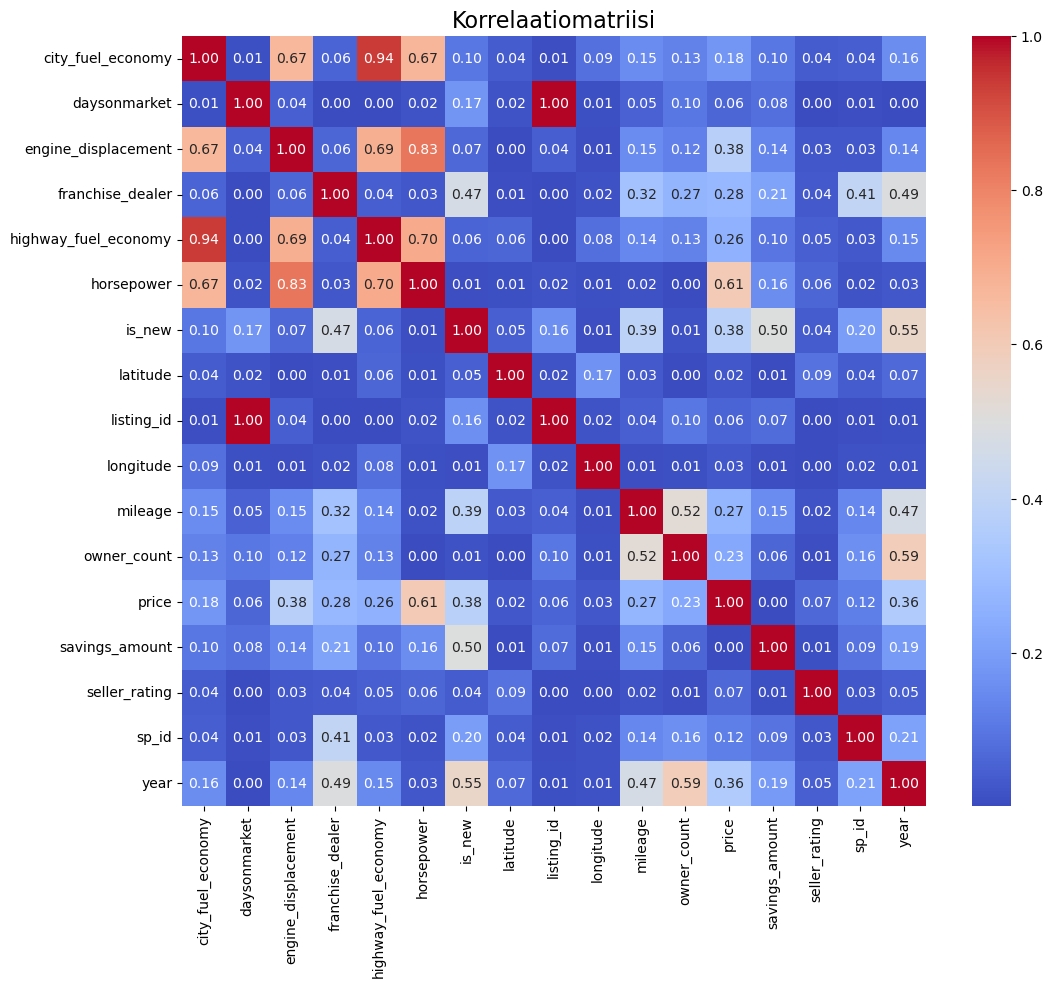

In [9]:
# Tehdään tämä korrelaatiomatriisi vain numeerisita ominaisuuksista sillä tässä vaiheessa ei vielä haluta pureutua datan esikäsittelyyn
# tai muokkaamiseen
df_vis = df.drop(['combine_fuel_economy', 'is_certified', 'vehicle_damage_category'], axis=1)
correlation_matrix = df_vis.corr(numeric_only=True).abs()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Otsikko ja akselit
plt.title("Korrelaatiomatriisi", fontsize=16)
#plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### 4.1 Korrelaation analysointi

Tein tähän vain tämän heatmapin, sillä se on hyvinkin selvä tapa ilmaista muuttujien välisiä korrelaatiota. Kuvassa on hyvinkin loogisia arvoja, jotka lohduttavat itseäni. Halusin myös tarkastella vain korrelaation vahvuutta, en suuntaa. Tämä on mielestäni vielä tässä kohtaa hyvä lähestymistapa.

Voidaan katsoa ja tulkita parit arvot:

* esim. koneen tyyppi, onko auto uusi ja kilometrimäärä muuttuvat vahvasti valmistusvuoden mukana
* koneentyyppi ja hevosvoimat määrittävät vahvasti toisiaan
* daysonmarket ja listing id saavat 1.00 joka on mielestäni vielä omituista
* Hevosvoimat kasvattavat kulutusta

### 5. Jakaumien visualisointi

Tässä piirretään kuvia joilla saadaan parempaa käsitystä datan jakaumasta.

#### 5.1 Histogrammit ja boxplotit

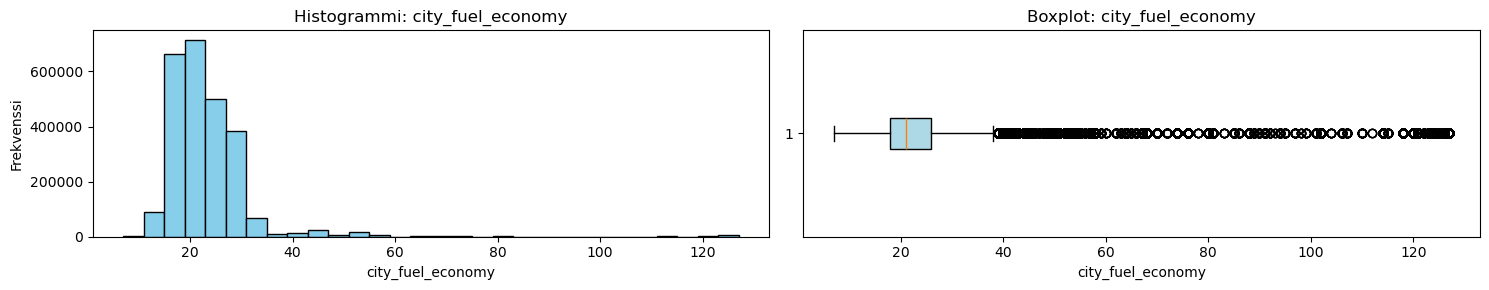

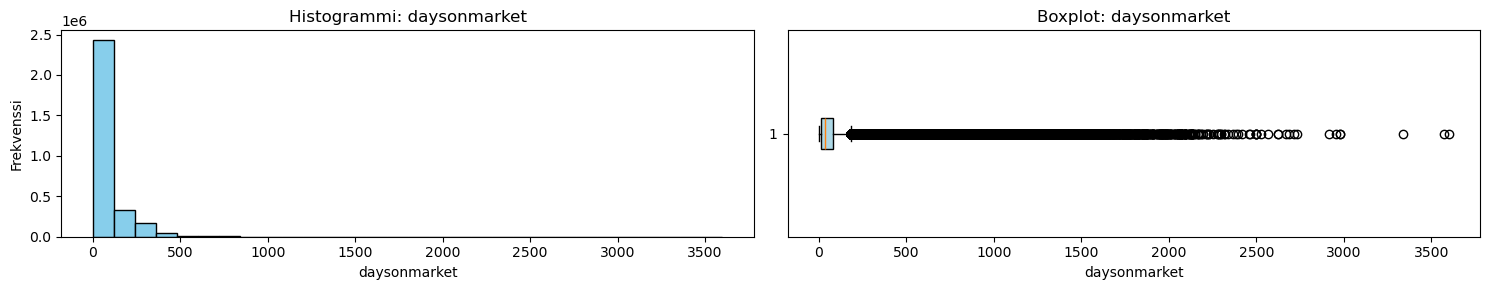

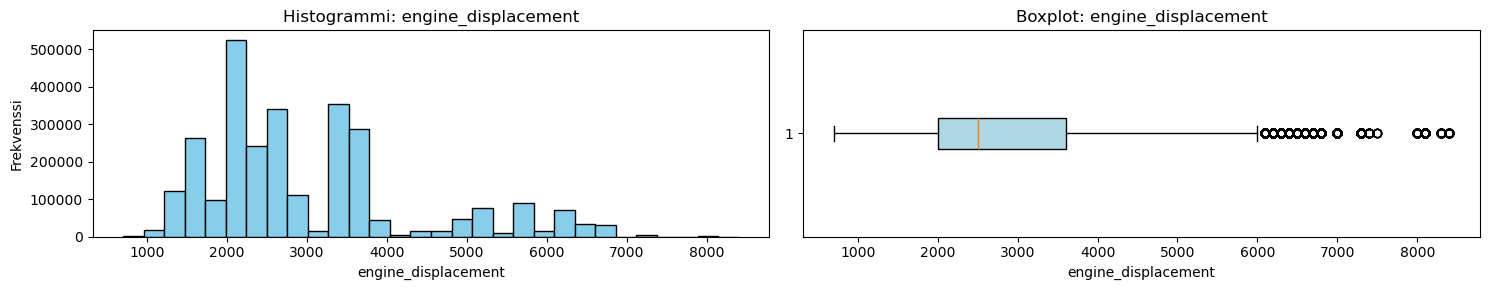

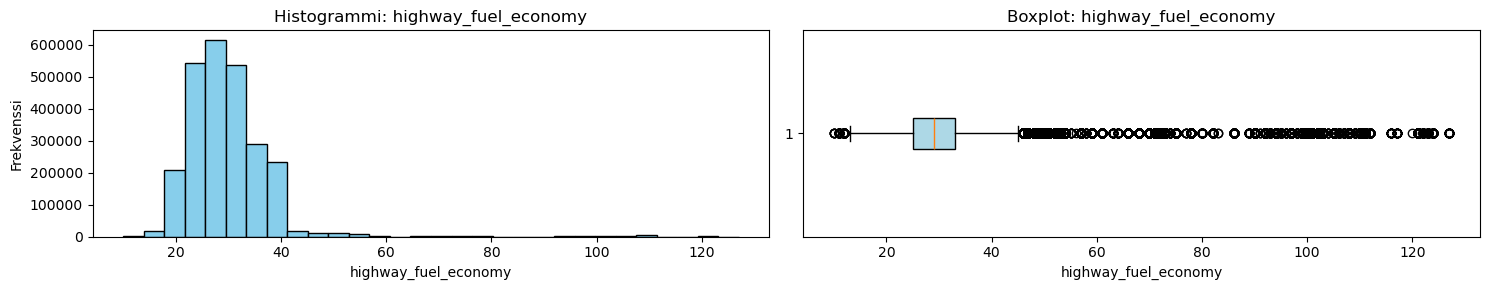

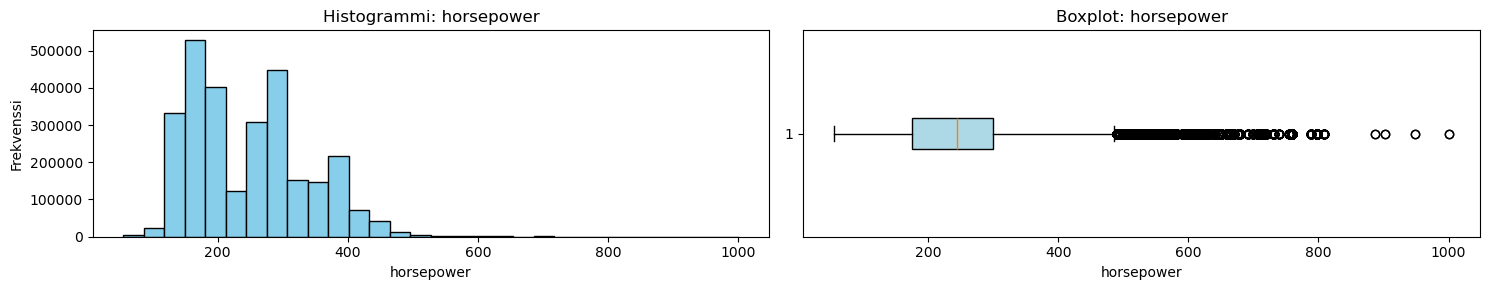

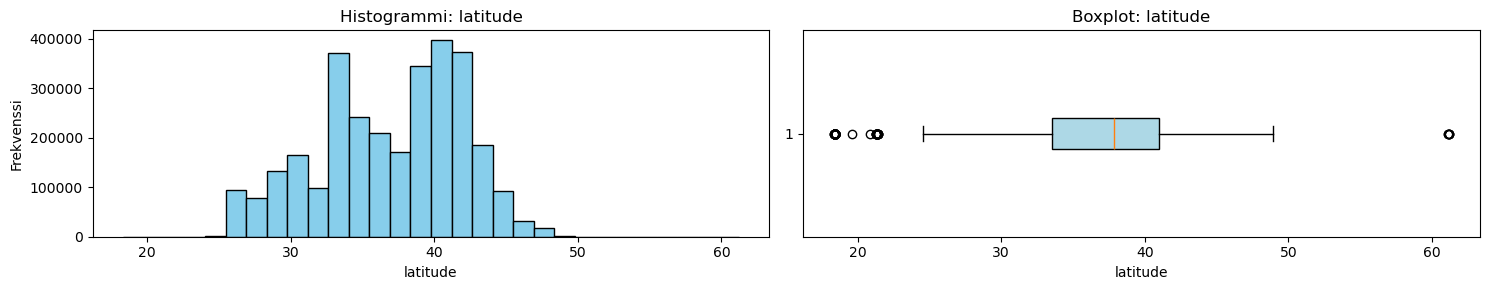

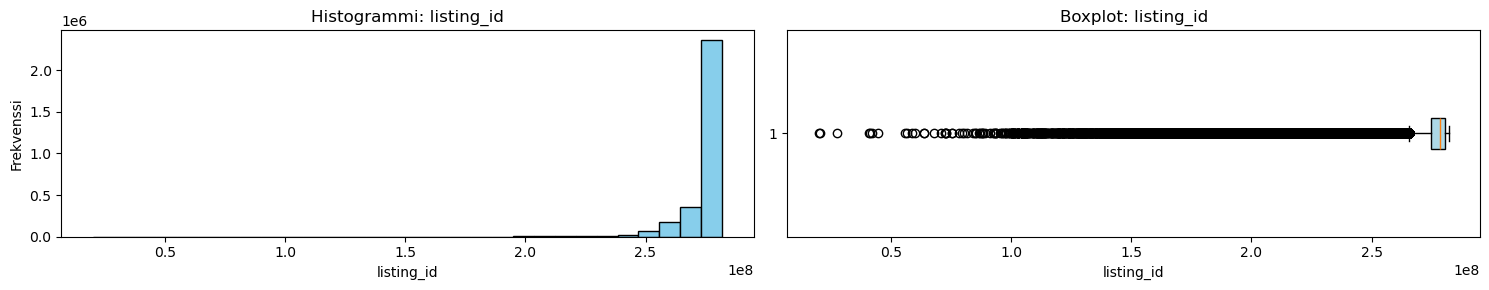

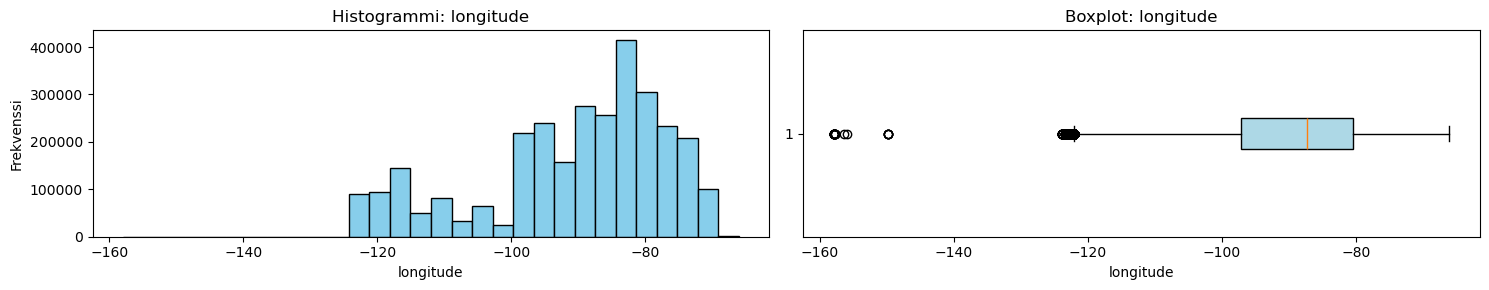

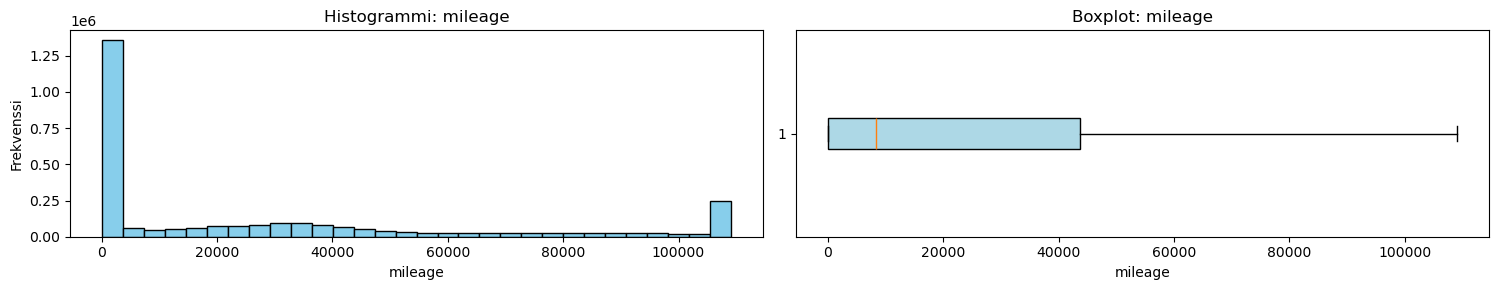

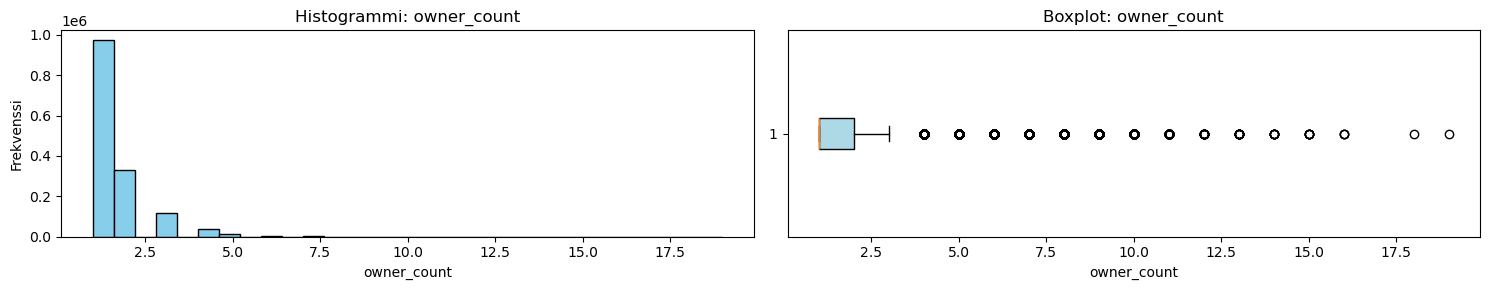

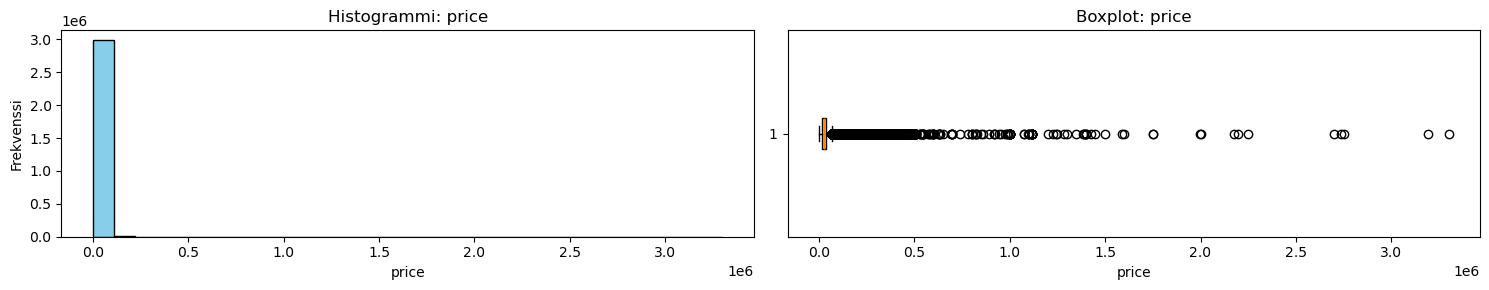

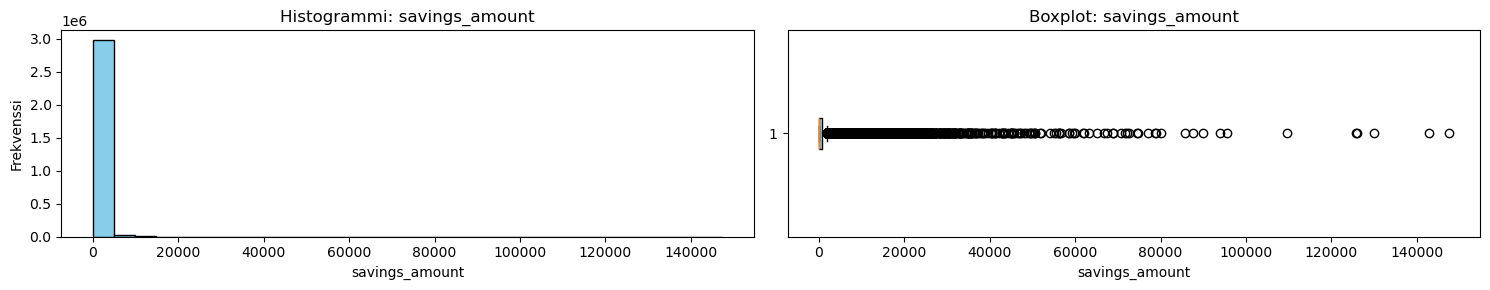

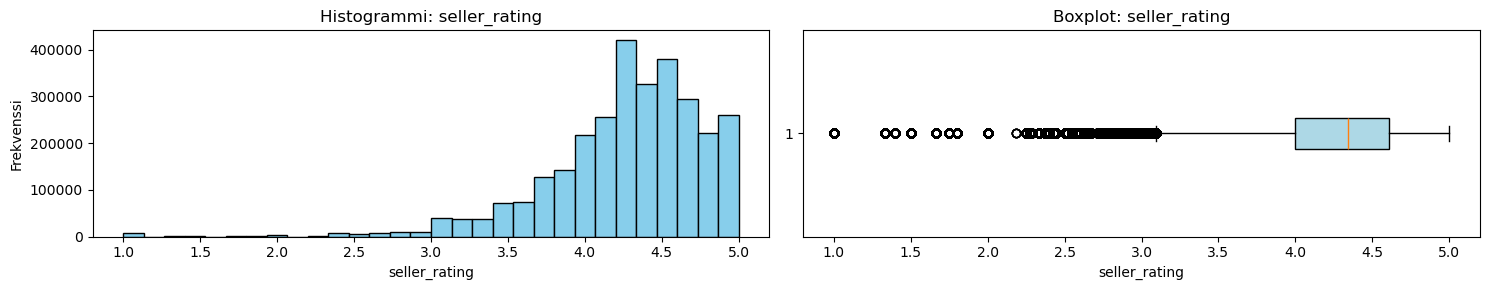

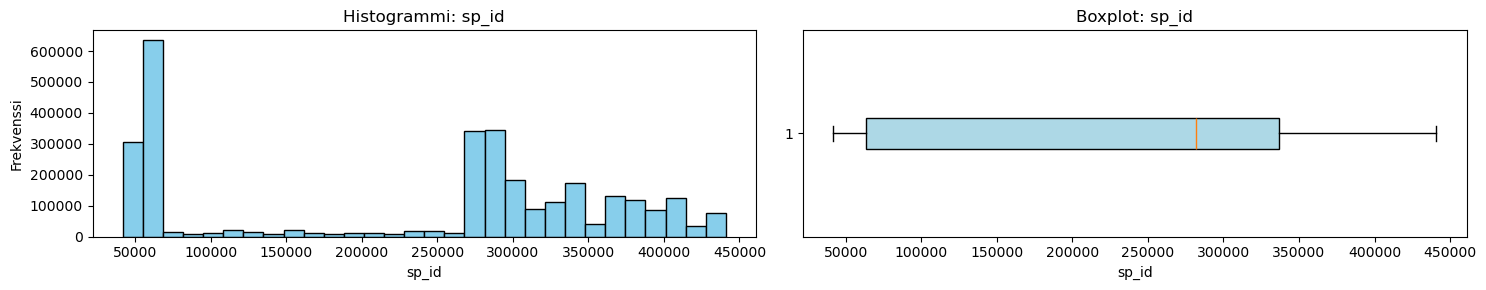

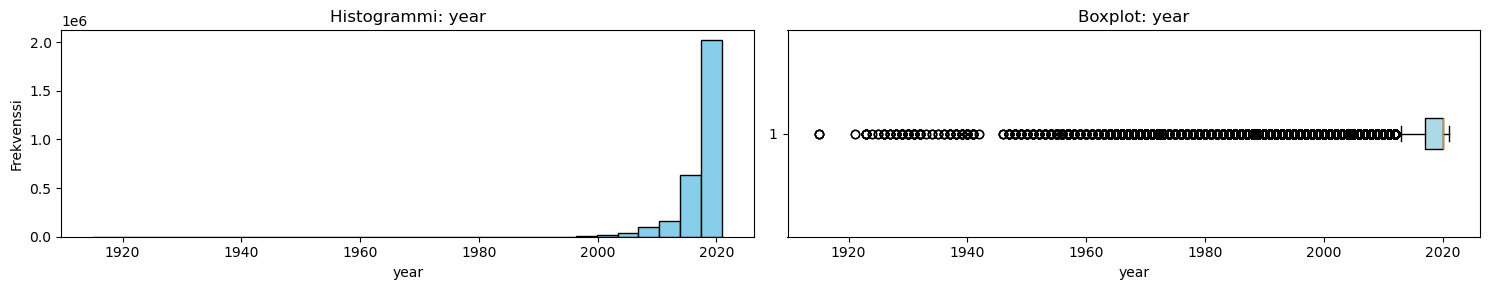

In [21]:
import matplotlib.pyplot as plt

# Tämä oli ehkä vähän overkill mutta mileagea piti rajata sillä siinä oli pari ihan tyhmän isoa arvoa
Q1 = df['mileage'].quantile(0.01)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['mileage'] = df['mileage'].clip(lower=lower_bound, upper=upper_bound)

# Valitaan taas vain numeeriset sarakkeet
df_vis = df.drop(['combine_fuel_economy', 'is_certified', 'vehicle_damage_category'], axis=1)
num_cols = df_vis.select_dtypes(include=['number']).columns

# Luodaan kuvat
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    
    # Histogrammit
    ax[0].hist(df_vis[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax[0].set_title(f"Histogrammi: {col}")
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Frekvenssi")
    
    # Boxplotit
    ax[1].boxplot(df_vis[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax[1].set_title(f"Boxplot: {col}")
    ax[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


### 5.2 Yhteenveto Jakaumien visualisoinnista

Piirretyt kuvat auttoivat paljonkin datan yleisessä ymmärtämisessä. Kuvista olisi saanut parempi ja selvempiä, jos olisi vaikka rajaillut vähän enemmän datasta poikkeamia pois, mutta mielestäni tässä vaiheessa ne oli hyvä nähdä. Kuvaajat menevät mukavasti yhdessä aijempien tutkimuksien ja havaintojen kanssa. Kun miettii yleistä automarkkinaa ja heijastaa kuvia omiinkin kokemuksiin, kuvat ovat fiksuja ja niistä on nähtävissä että data on vähintäänkin pääosin laadukasta. Näistä on varmasti hyötyä kun jatketaan seuraaviin osioihin.

### 6. Mahdolliset ongelmakohdat

Katsastamme jakauman vinoumaa ja huipukkuutta.

In [22]:
# Laske skewness kaikille numeerisille sarakkeille
skewness = df[num_cols].skew()
print("Vinous (skewness):")
print(skewness)

Vinous (skewness):
city_fuel_economy        5.831910
daysonmarket             3.910211
engine_displacement      1.102492
highway_fuel_economy     3.631934
horsepower               0.707925
latitude                -0.333228
listing_id              -4.460187
longitude               -0.802569
mileage                  1.149739
owner_count              2.468242
price                   14.912970
savings_amount          11.937178
seller_rating           -1.494676
sp_id                   -0.318457
year                    -4.598271
dtype: float64


In [23]:
# Laske kurtosis kaikille numeerisille sarakkeille
kurtosis = df[num_cols].kurtosis()
print("Huipukkuus (kurtosis):")
print(kurtosis)

Huipukkuus (kurtosis):
city_fuel_economy         58.042484
daysonmarket              32.644692
engine_displacement        0.528181
highway_fuel_economy      31.197095
horsepower                 0.291614
latitude                  -0.735270
listing_id                41.098227
longitude                 -0.308456
mileage                   -0.007068
owner_count                9.289096
price                   1376.918739
savings_amount           757.585009
seller_rating              4.890616
sp_id                     -1.457615
year                      46.722313
dtype: float64


#### 6.1 Yhteenveto vinouma ja huipukkuus

Positiivinen vinous kertoo että suurin osa arvoista on pienellä alueella (oikealla) mutta mukana voi olla joitain todella korkeita arvoja. Puolestaan matala vinoima kertoo että arvot ovat painottuneet korkeammalle alueelle (vasemmalle).

Korkea huipukkuus kertoo että jakaumat ovat teräviä ja keskittyneitä, viitaten siihen että todella suuria määriä dataa on tietyllä pisteellä. Matala huipukkuus taas kertoo tasaisesta datan jakaumasta kuvan alueelle.

* price ja savings_amount sisältävät erittäin korkeita poikkeamia, mikä vaatii tarkempaa tarkastelua ja mahdollisesti rajaamista ennen jatkoanalyysia
* listing_id ja year ovat voimakkaasti vinoutuneita negatiiviseen suuntaan, mikä voi olla datan rakenneominaisuus eikä välttämättä ongelma. Tämä herättää kysymyksen että mikä listing_id on? Silmälle kuitenkin vain "satunnaisluku"
* Matalan vinouden ja huipukkuuden muuttujat, kuten horsepower ja engine_displacement, näyttävät jakaumaltaan tasapainoisilta, eivätkä vaadi välitöntä käsittelyä

### 7. Yhteenveto datan ymmärtämisestä

Tämä raportti on ollut tulevan työmme alustana ja olemme tutustuneet dataan ja sen piirteisiin. Histogrammin ja boxplotin avulla tarkastelimme numeeristen muuttujien jakaumia ja havaitsimme, että esimerkiksi hinnat ja ajokilometrit ovat vahvasti vinoja ja sisältävät poikkeavia arvoja. Korrelaatiot ja palkkikaaviot auttoivat ymmärtämään muuttujien välisiä yhteyksiä ja kategoristen muuttujien yleisyyksiä.

Keskeisiä löydyksiä:

* Poikkeavat arvot: Useissa muuttujissa, kuten price ja mileage, havaittiin äärimmäisiä arvoja. Tässä vaiheessa tämä haittasi vähän kuvaajia, mutta pitää miettiä seuraavassa vaiheessa mitä poikkeaville arvoille tehdään
* Vinous ja huipukkuus: Monet muuttujat, kuten price, ovat vahvasti vinoja ja keskittyneitä mikä saattaa tarvita esikäsittelyä ennen kuin dataa syötetään mallille
* Kategoriset muuttujat: Useissa kategorioissa, kuten body_type, on selkeästi yleisiä ja harvinaisia arvoja, jotka voivat vaikuttaa analyysiin

Näitä huomioita ja matkan varrella esiin tulevia asioita jatkamme ja työstämme tulevissa vaiheissa. Vaikkakin datassa on vielä virheitä joista ylemäpänä kirjoitin, moni näistä virheitä on hyvinkin loogisia kun miettii myytävien autojen ominaisuuksien jakaumia. Tämä analyysi antaa vahvan pohjan datan puhdistukselle ja mallinnuksen valmistelulle.